In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
from scipy import stats
from scipy.stats import norm

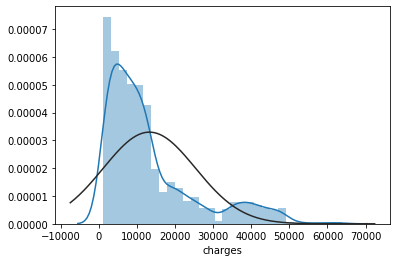

In [17]:
sns.distplot(df.charges,fit=norm)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 60021.39897,
         62592.87309, 63770.42801])),
 (10952.462526491305, 13270.422265141258, 0.9028052656368238))

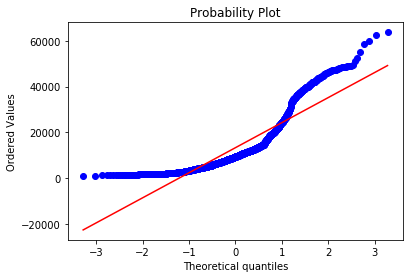

In [13]:
stats.probplot(df.charges, plot=plt)

In [57]:

df.charges.skew()

1.5158796580240388

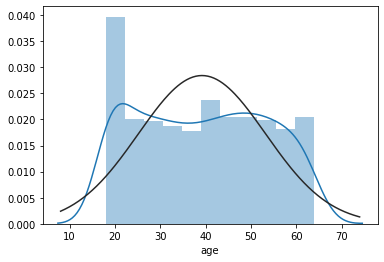

In [16]:
sns.distplot(df.age, fit=norm)

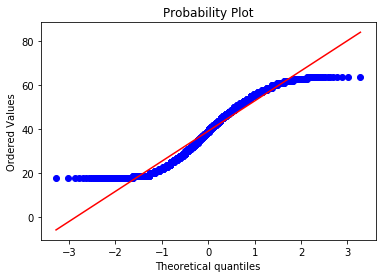

In [24]:
stats.probplot(df.age,plot=plt);

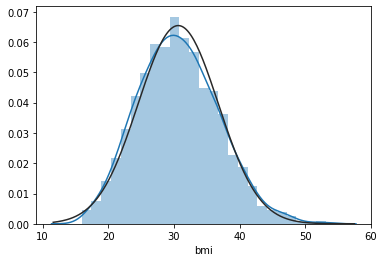

In [25]:
sns.distplot(df.bmi,fit=norm)

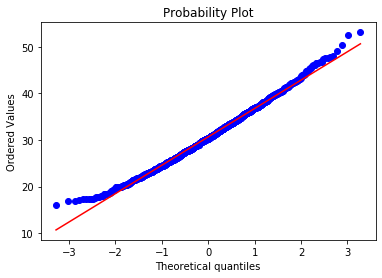

In [26]:
stats.probplot(df.bmi,plot=plt);

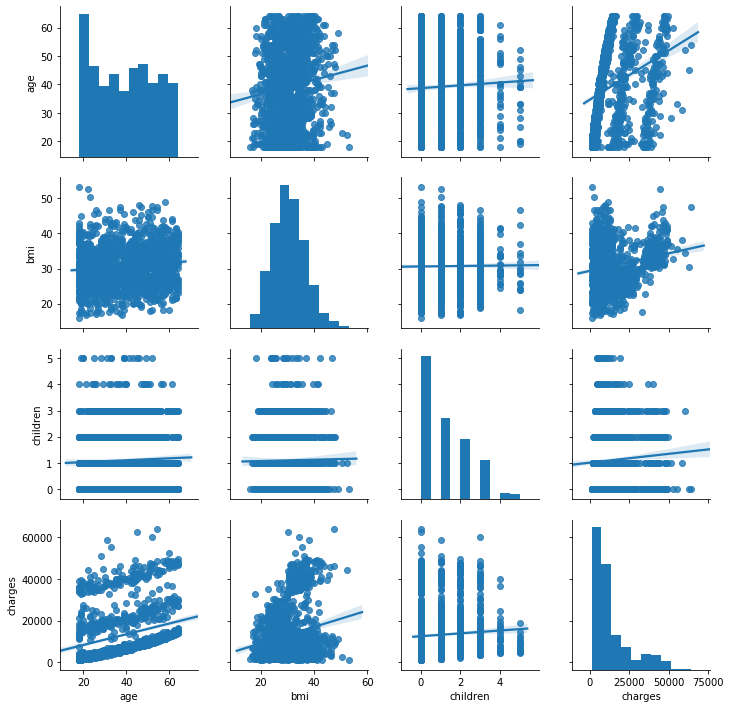

In [28]:
sns.pairplot(df,kind='reg')

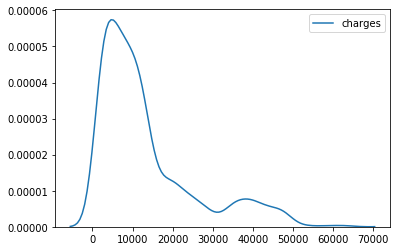

In [29]:
sns.kdeplot(df.charges)

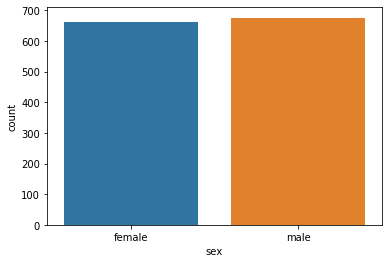

In [30]:
sns.countplot(df.sex)

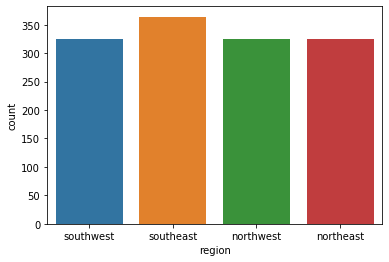

In [31]:
sns.countplot(df.region)

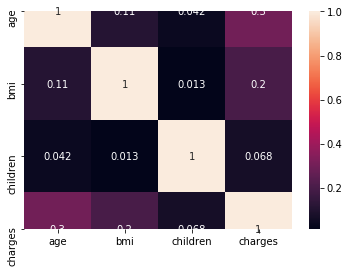

In [32]:
sns.heatmap(df.corr(),annot=True)

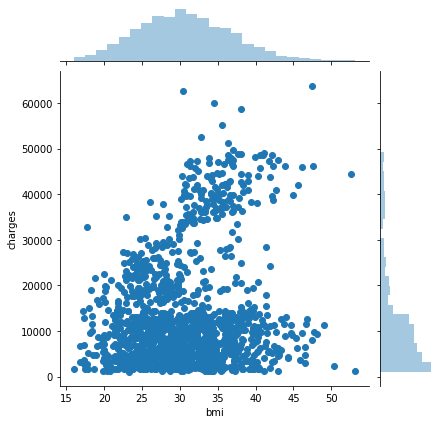

In [34]:
sns.jointplot(df.bmi,df.charges)

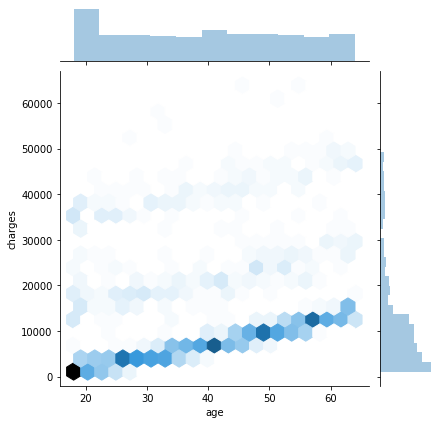

In [35]:
sns.jointplot(df.age,df.charges,kind='hex')

In [37]:
df.select_dtypes(include=['object']).columns.values

array(['sex', 'smoker', 'region'], dtype=object)

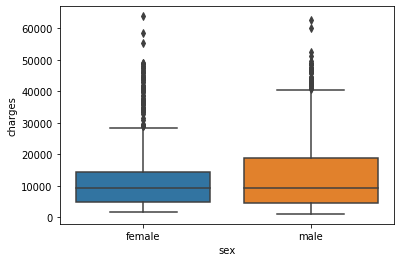

In [38]:
sns.boxplot(df.sex,df.charges)

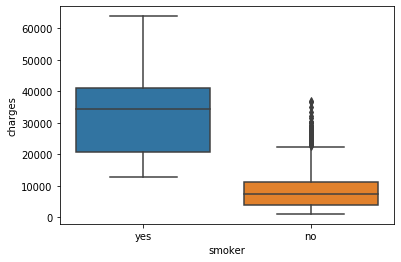

In [39]:
sns.boxplot(df.smoker,df.charges)

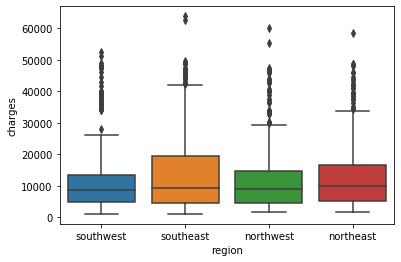

In [40]:
sns.boxplot(df.region,df.charges)

In [41]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
df=pd.get_dummies(df)

In [43]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


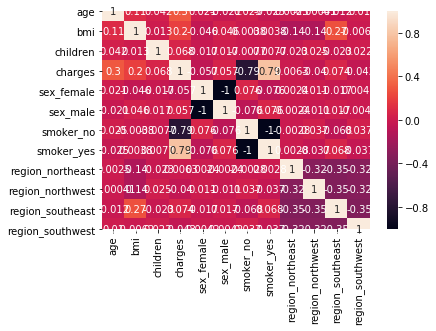

In [44]:
sns.heatmap(df.corr(),annot=True)

In [47]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [48]:
x=df[['age','bmi','smoker_yes']]
y=df['charges']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [54]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
pred=lm.predict(x_test)

In [56]:
lm.intercept_

-11707.802334583144

In [58]:
results=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficients'])

In [59]:
results

,Coefficients
age,259.410205
bmi,326.450232
smoker_yes,23675.371847


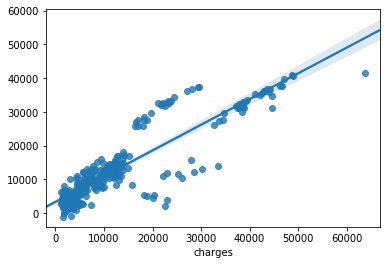

In [60]:
sns.regplot(y_test,pred)

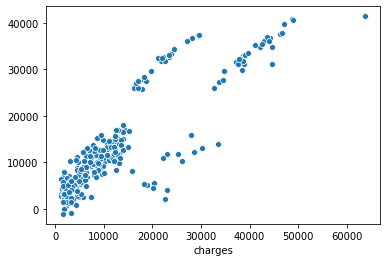

In [61]:
sns.scatterplot(y_test,pred)

In [62]:
from sklearn import metrics


In [64]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 4260.560091099391
MSE: 34512843.88022789
RMSE: 5874.763304187488


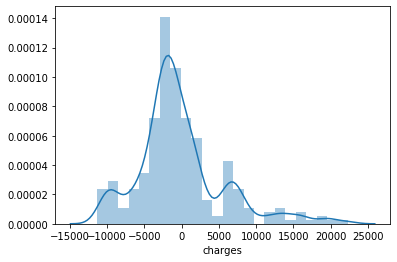

In [65]:
sns.distplot(y_test-pred)